In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [21]:
challenge_set_updated = pd.read_csv('./data/challenge_set_updated_v18.csv')
submission_set_updated = pd.read_csv('./data/submission_set_updated_v18.csv')
submission = pd.read_csv('catboost_sat.csv')

In [34]:
tow = challenge_set_updated['tow'].sort_values()
print(tow)

100214     14944.0
146622     15890.0
302645     15890.0
232169     15890.0
132193     15901.0
            ...   
238729    351327.0
349963    351327.0
197315    351327.0
234622    351327.0
166903    351327.0
Name: tow, Length: 369013, dtype: float64


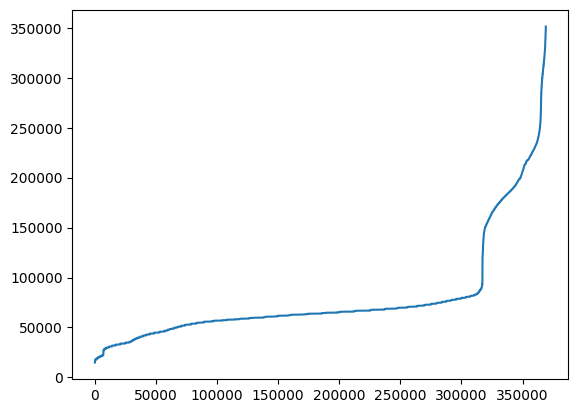

In [4]:
plt.plot(tow.to_numpy())

In [5]:
aircraft_types = challenge_set_updated['aircraft_type'].unique()

A320 Large (79761, 216)
B772 Heavy (8322, 216)
A333 Heavy (17011, 216)
B788 Heavy (5960, 216)
A21N Large (23257, 216)
A20N Large (37944, 216)
B738 Large (37495, 216)
B789 Heavy (5734, 216)
A321 Large (29423, 216)
CRJ9 Large (22926, 216)
A319 Large (17578, 216)
B77W Heavy (9162, 216)
BCS3 Large (11936, 216)
AT76 Large (6897, 216)
E190 Large (2105, 216)
B763 Heavy (1190, 216)
BCS1 Large (4649, 216)
E195 Large (24914, 216)
B38M Large (12330, 216)
B739 Large (1793, 216)
B737 Large (3627, 216)


C:\Users\rudog\AppData\Local\Temp\ipykernel_41404\1378430332.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


A359 Heavy (1725, 216)
A332 Heavy (2241, 216)
B39M Large (542, 216)
A343 Heavy (480, 216)
A310 Heavy (2, 216)
B752 Large (6, 216)
B773 Heavy (1, 216)
C56X Small+ (1, 216)
E290 Large (1, 216)


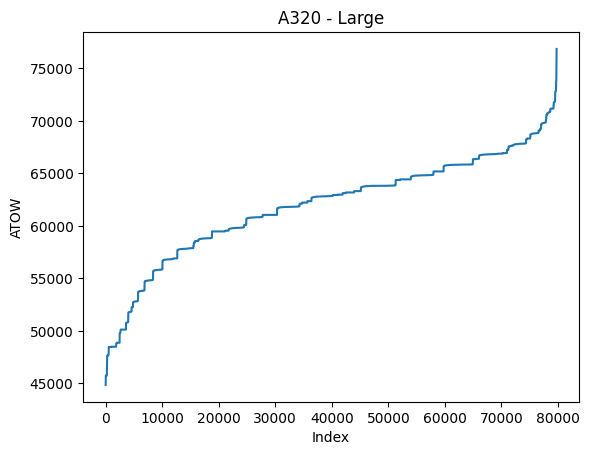

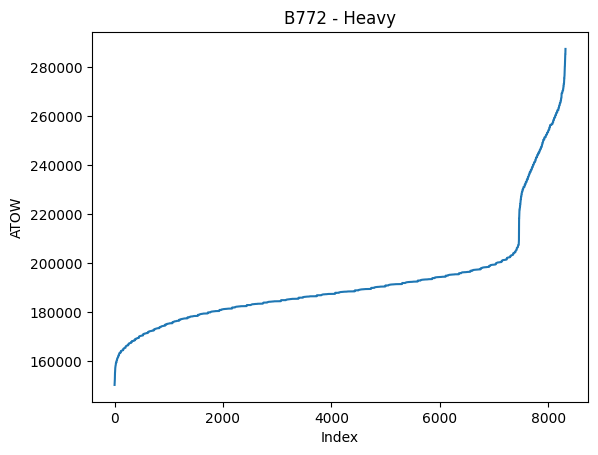

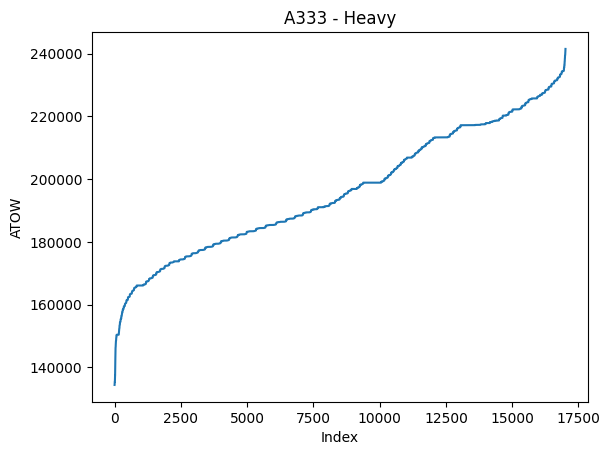

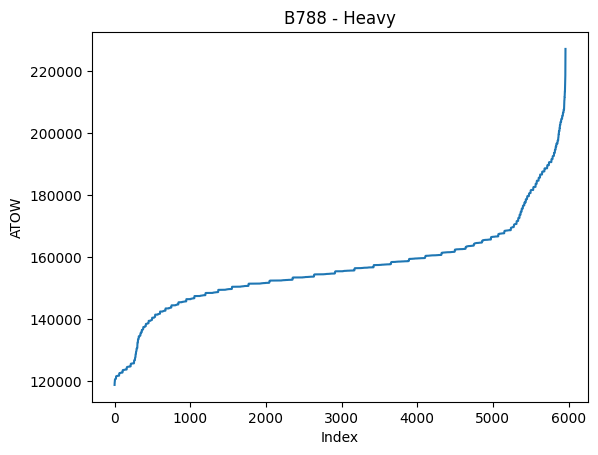

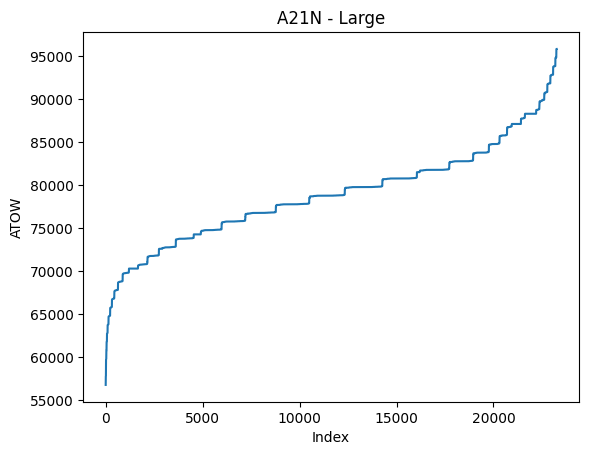

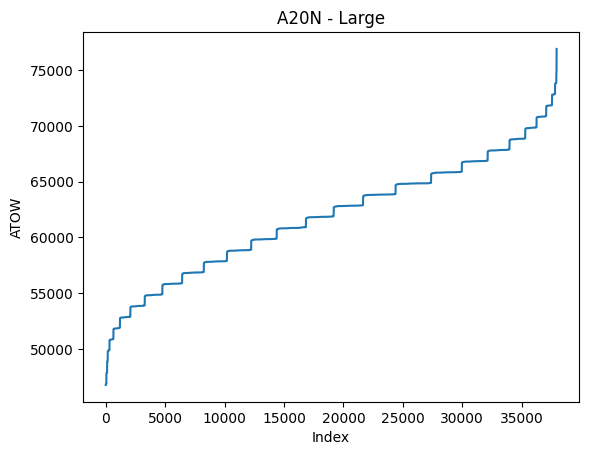

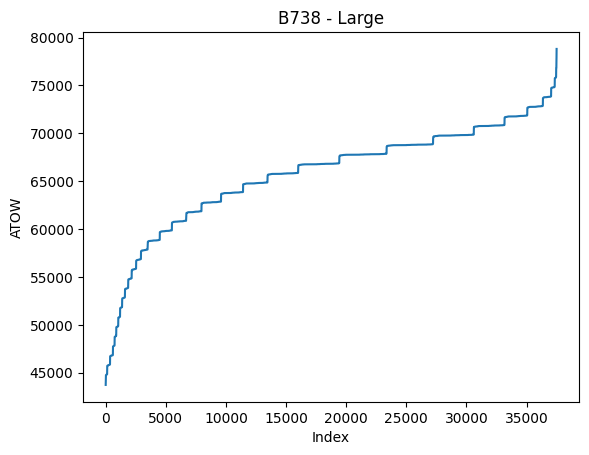

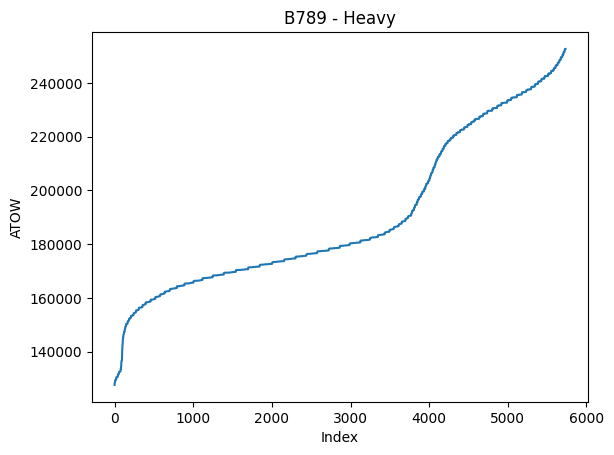

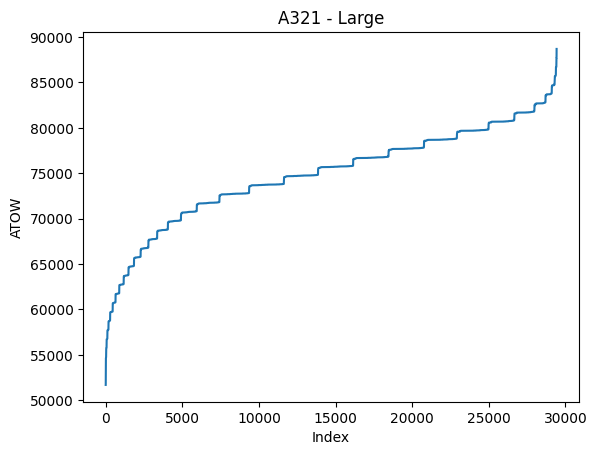

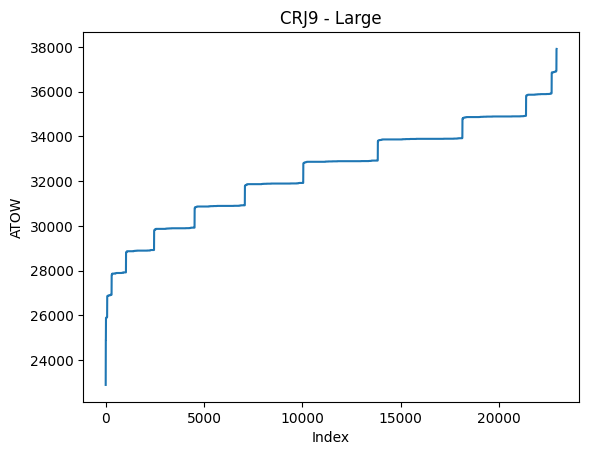

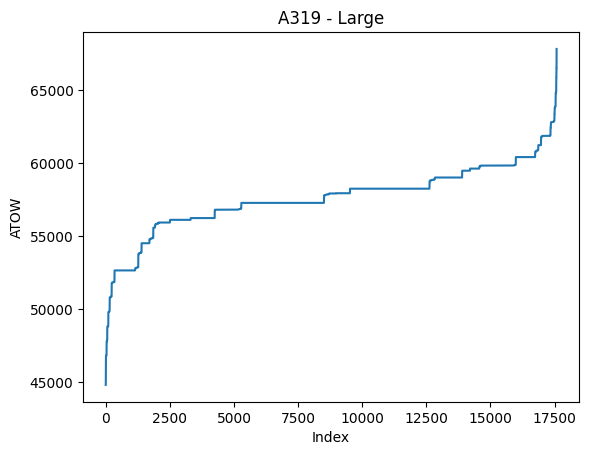

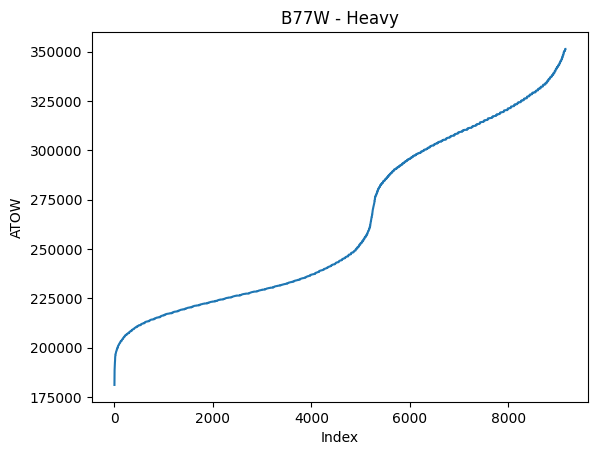

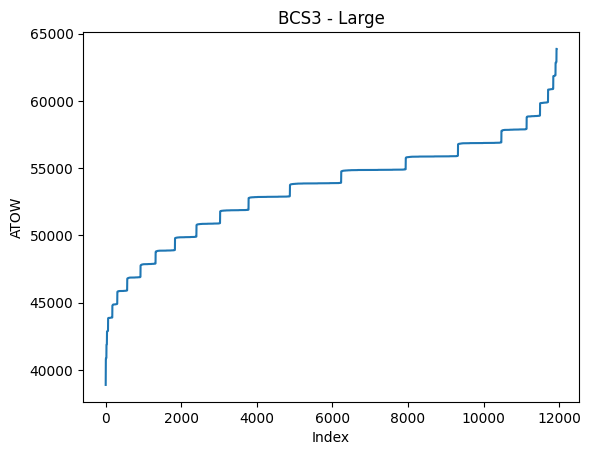

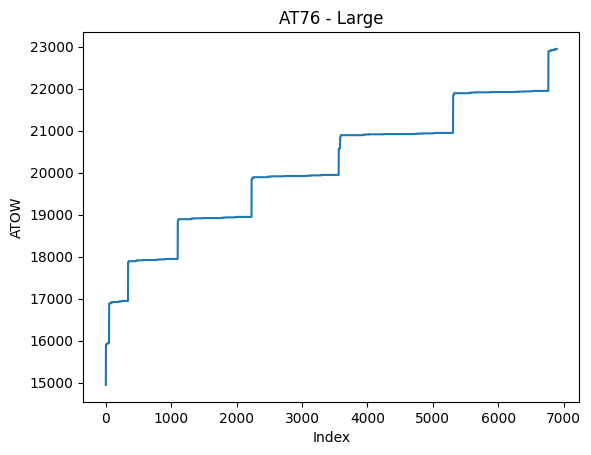

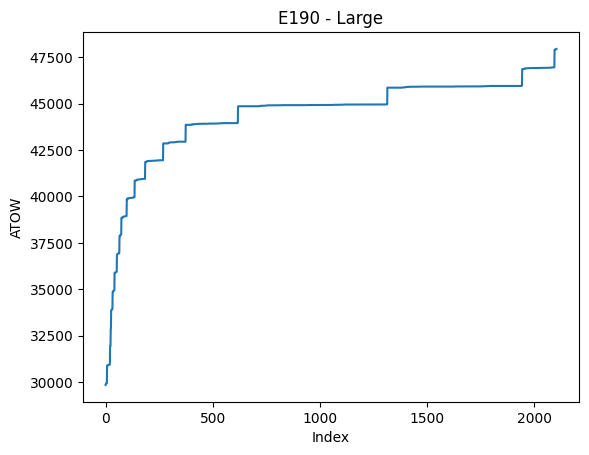

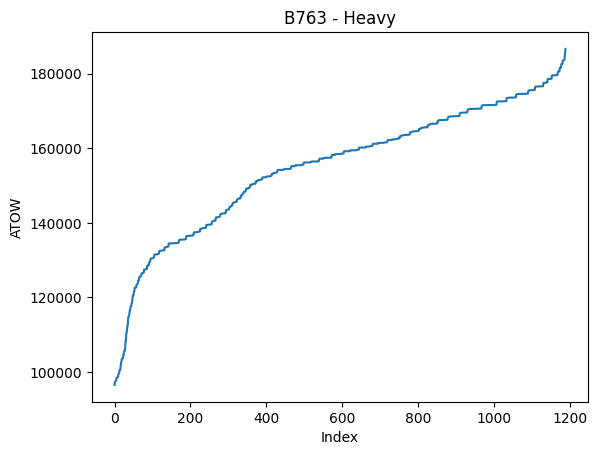

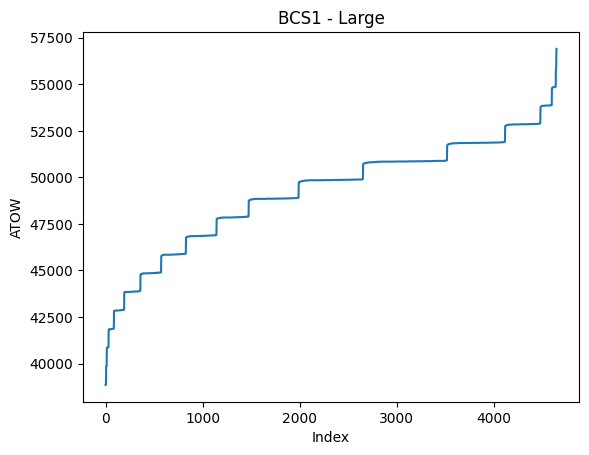

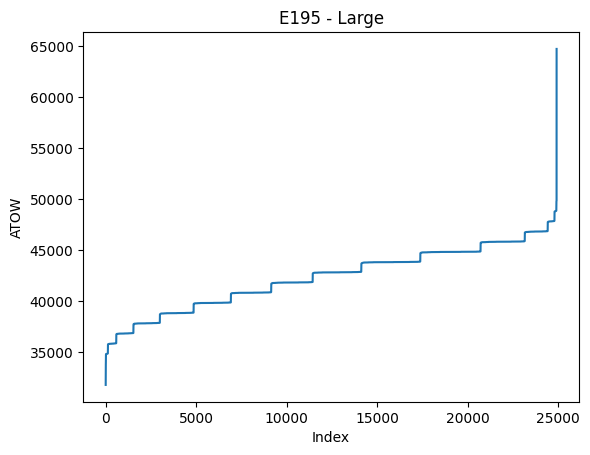

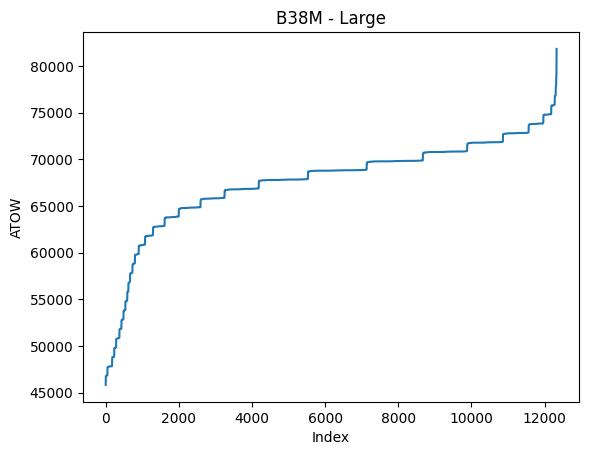

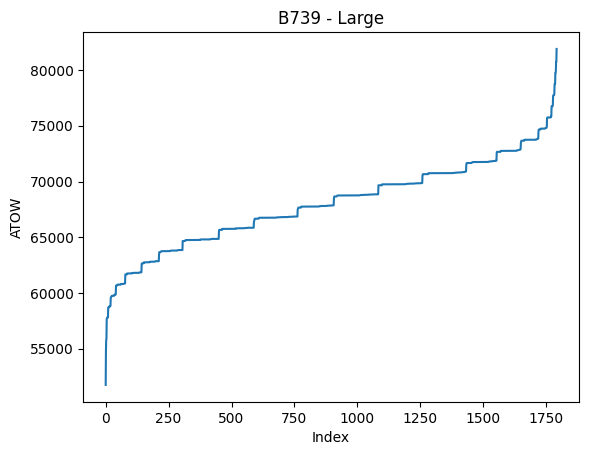

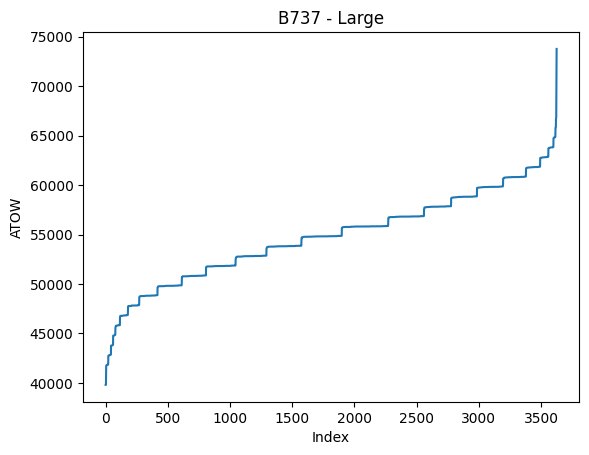

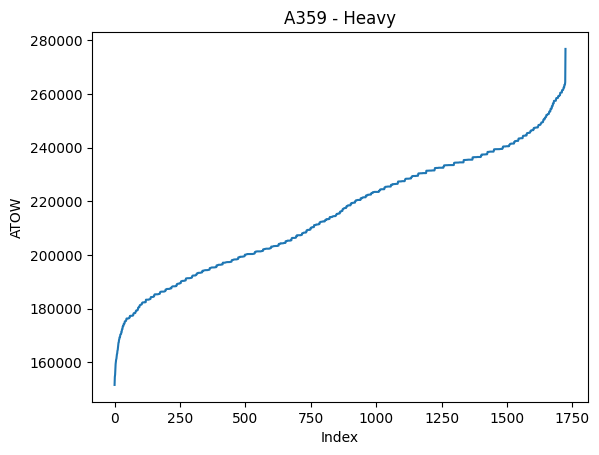

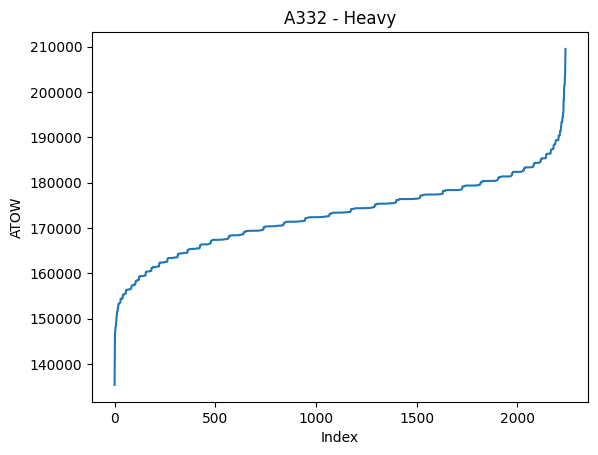

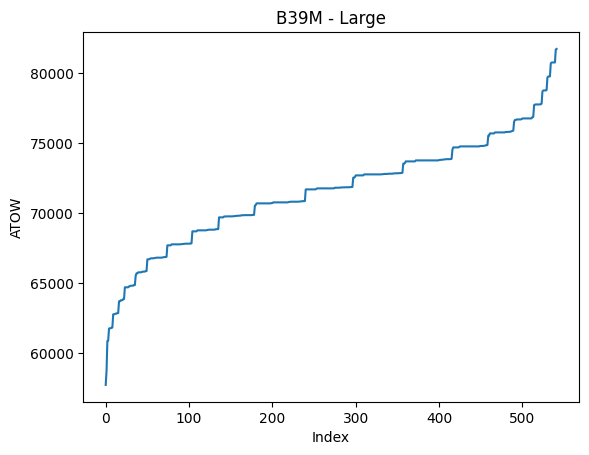

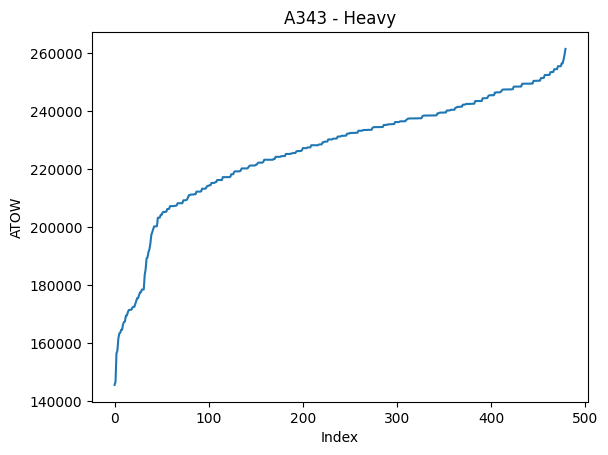

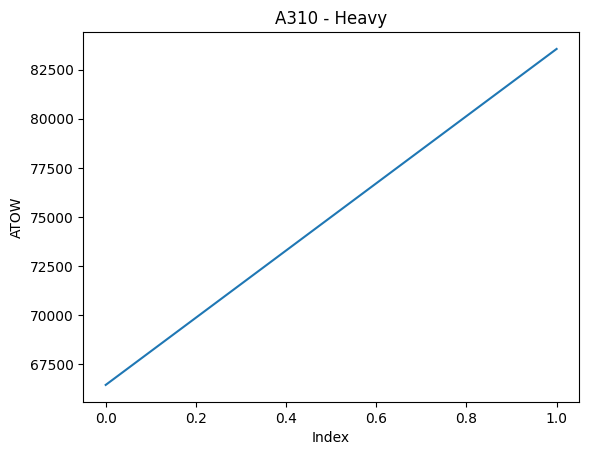

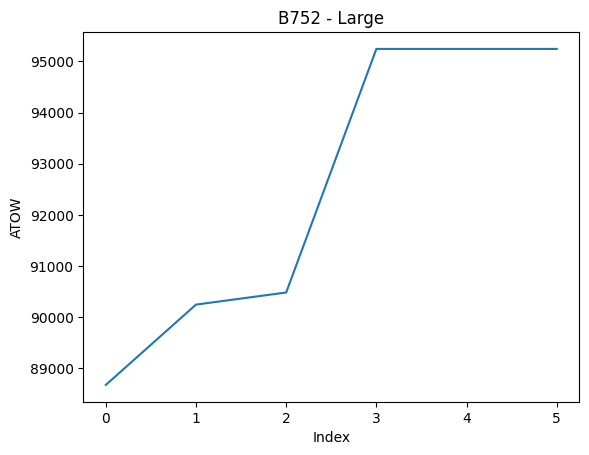

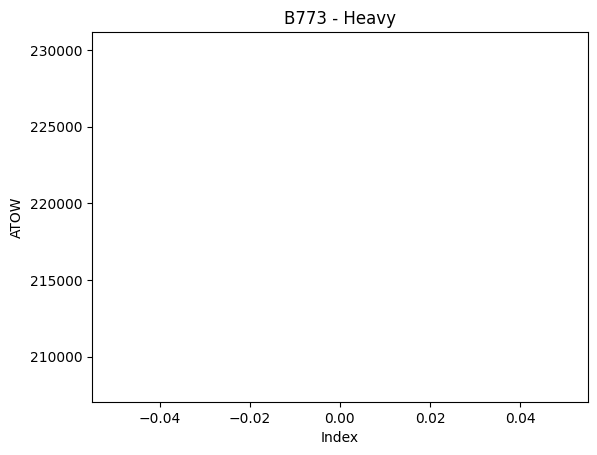

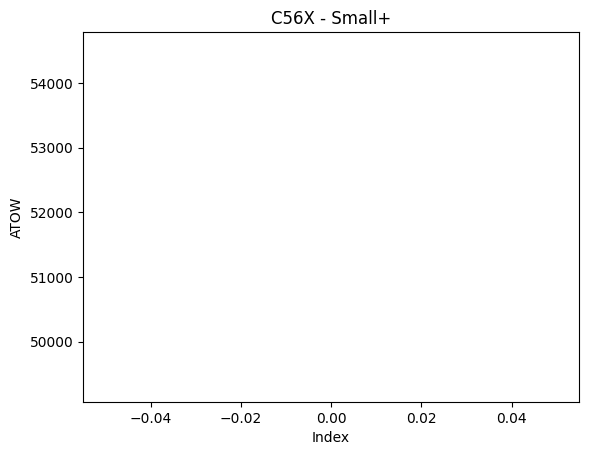

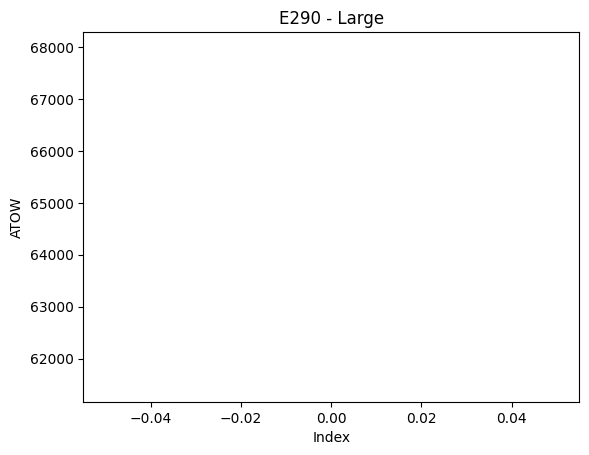

In [6]:
for aircraft_type in aircraft_types:
    flights = challenge_set_updated[challenge_set_updated['aircraft_type'] == aircraft_type]
    first_row = flights.iloc[0]
    weight_type = first_row['FAA_Weight']
    print(aircraft_type, weight_type, flights.shape)
    sorted_tows = challenge_set_updated[challenge_set_updated['aircraft_type'] == aircraft_type]['tow'].sort_values().to_numpy()
    plt.figure()
    plt.plot(sorted_tows)
    plt.xlabel('Index')
    plt.ylabel('ATOW')
    plt.title('%s - %s' % (aircraft_type, weight_type))
    # print(first_row)

In [35]:
submission_set_updated['tow'] = submission['tow']
submission_set_updated.head()

,callsign,adep,ades,aircraft_type,wtc,airline,taxiout_time,flown_distance,track_variation_ARR_100,track_variation_DEP_40,...,Latitude_ades,Longitude_ades,Altitude_ades,actual_distance,altitude_difference,bearing,elevation_gradient,adep_geo_cluster,ades_geo_cluster,tow
0,3b3de0f3ad0ee192513995c02f7bf7cf,LTFJ,LFLL,B738,M,6351ec1b849adacc0cbb3b1313d8d39b,15.0,1122,95.626012,61.832877,...,45.726,5.091,251,2022.915548,-61,293.477205,-0.030154,11,17,69471.340811
1,e06dd03d4a879ca37d9e18c1bd7cad16,EBBR,KJFK,A333,H,bdeeef3a675587d530de70a25d7118d2,15.0,3205,101.189988,65.739142,...,40.640,-73.779,4,5886.430370,-53,291.395141,-0.009004,6,1,213694.398801
2,2d3b1c962c78c4ebeef11bcd51b9e94c,KMIA,EGLL,B77W,H,5543e4dc327359ffaf5b9c0e6faaf0e1,10.0,3965,1.711789,74.068356,...,51.477,-0.461,25,7108.920003,22,43.036806,0.003095,12,13,222960.985730
3,35f7721f68bf85128195547ae38b0f04,EBBR,LEAL,B738,M,f53c55b5cf0cbb3be755bf50df6fa52d,9.0,802,101.738231,51.771476,...,38.282,-0.558,44,1458.405355,-13,197.753476,-0.008914,6,19,66906.673630
4,eb56918bee9bc5204624186b9bcc4391,LSZH,LFPG,BCS3,M,2d5def0a5a844b343ba1b7cc9cb28fa9,11.0,292,68.791836,68.987429,...,49.013,2.550,120,476.291487,-312,293.398537,-0.655061,2,6,51449.156576


A320 Large (79761, 216)
B772 Heavy (8322, 216)
A333 Heavy (17011, 216)
B788 Heavy (5960, 216)
A21N Large (23257, 216)
A20N Large (37944, 216)
B738 Large (37495, 216)
B789 Heavy (5734, 216)
A321 Large (29423, 216)
CRJ9 Large (22926, 216)
A319 Large (17578, 216)
B77W Heavy (9162, 216)
BCS3 Large (11936, 216)
AT76 Large (6897, 216)
E190 Large (2105, 216)
B763 Heavy (1190, 216)
BCS1 Large (4649, 216)
E195 Large (24914, 216)
B38M Large (12330, 216)
B739 Large (1793, 216)
B737 Large (3627, 216)
A359 Heavy (1725, 216)


C:\Users\rudog\AppData\Local\Temp\ipykernel_41404\65724607.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


A332 Heavy (2241, 216)
B39M Large (542, 216)
A343 Heavy (480, 216)
A310 Heavy (2, 216)
B752 Large (6, 216)
B773 Heavy (1, 216)
C56X Small+ (1, 216)
E290 Large (1, 216)


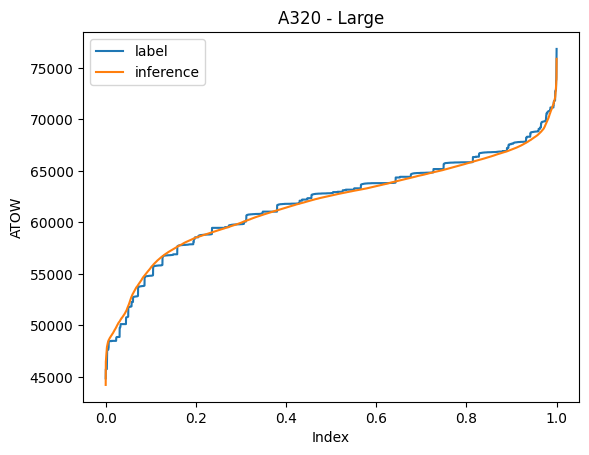

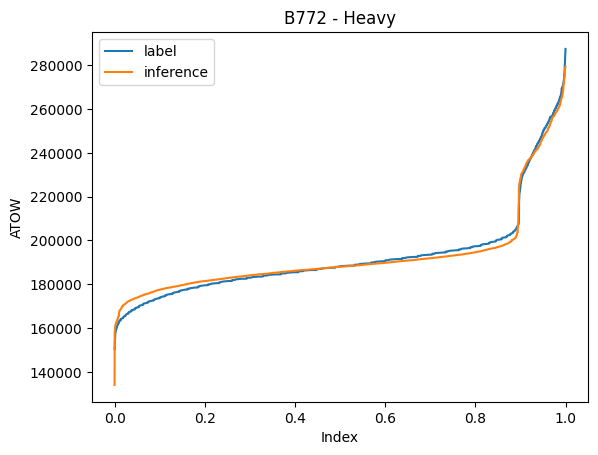

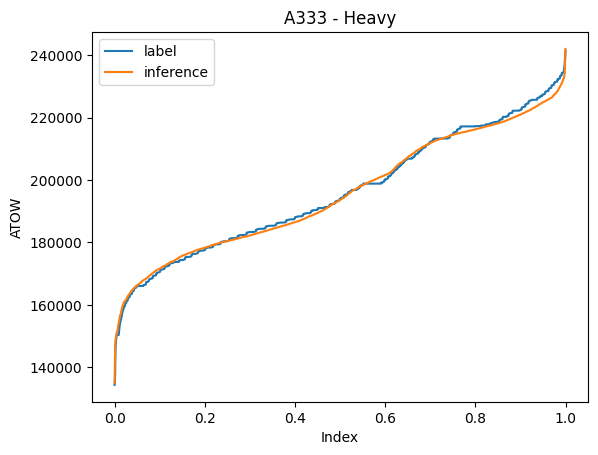

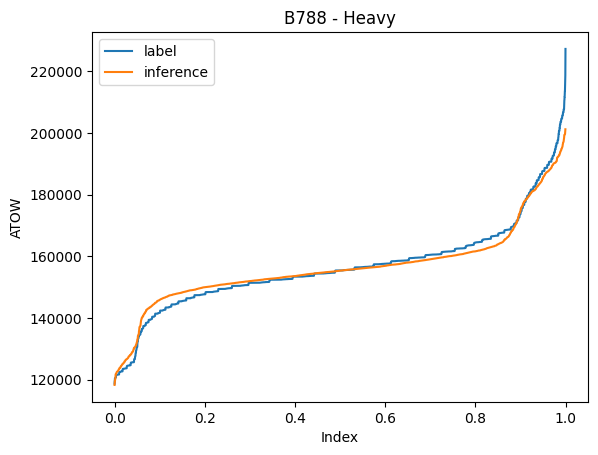

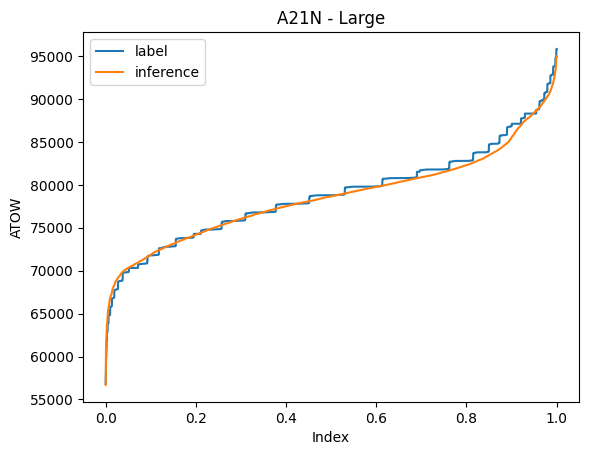

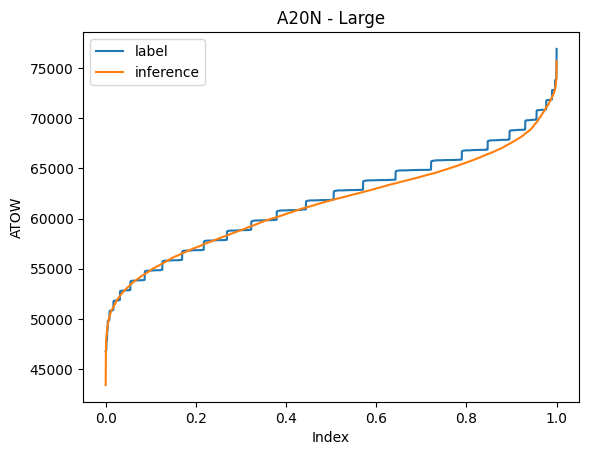

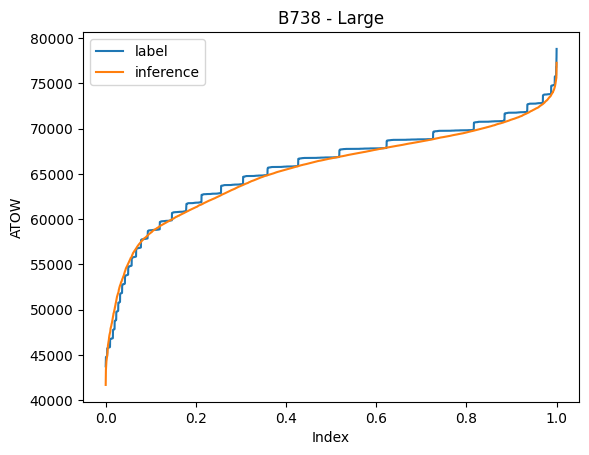

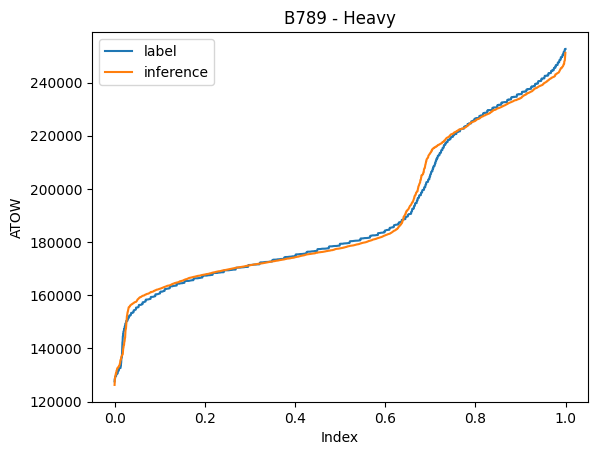

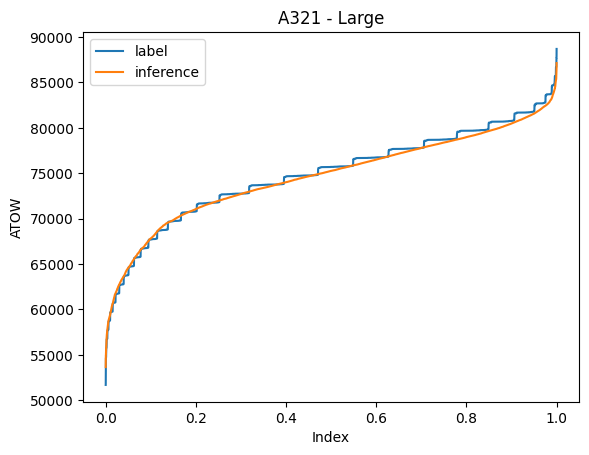

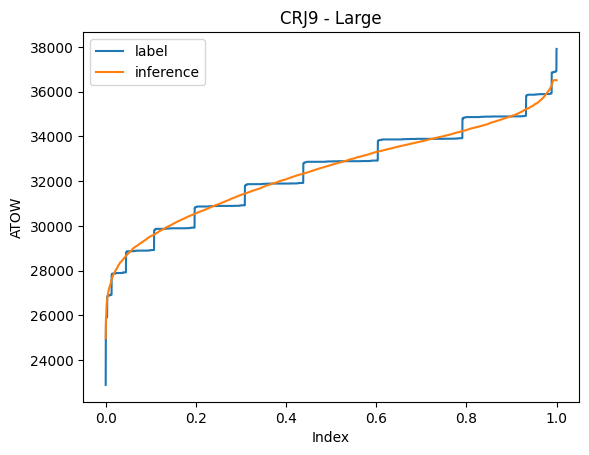

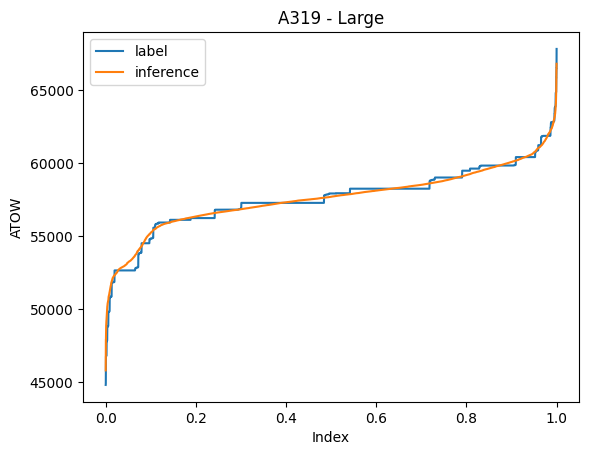

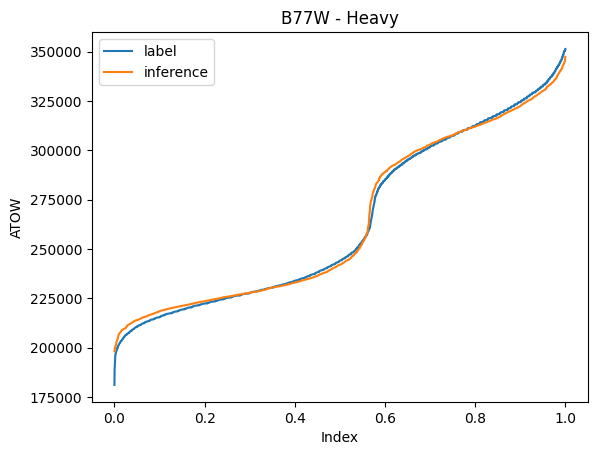

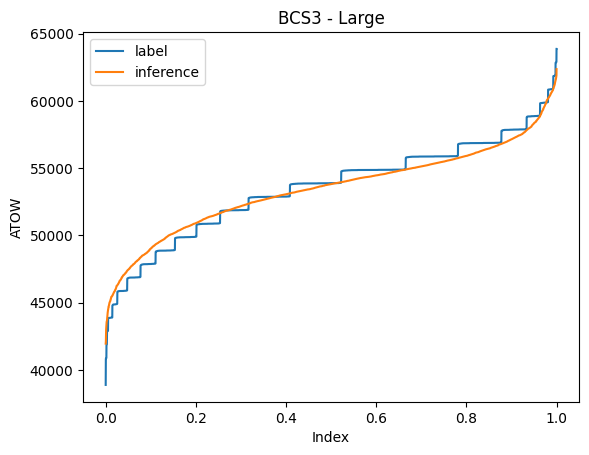

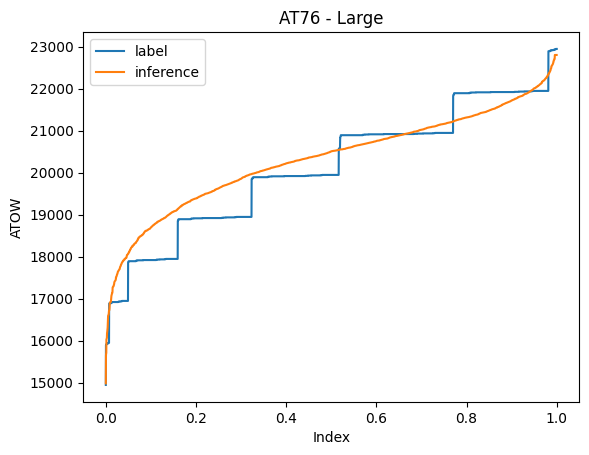

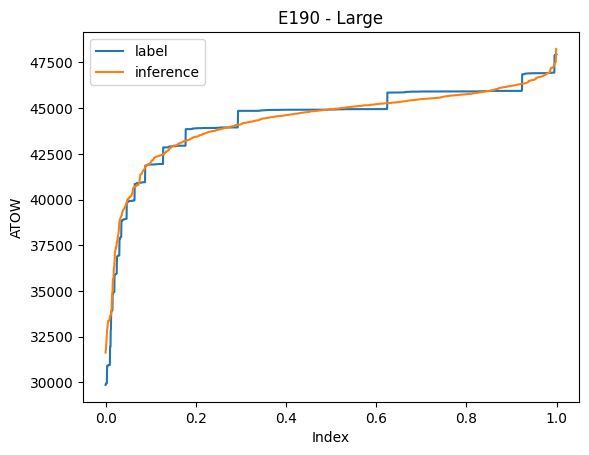

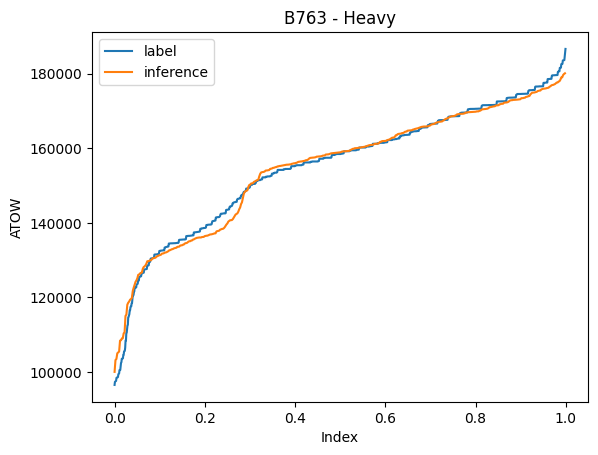

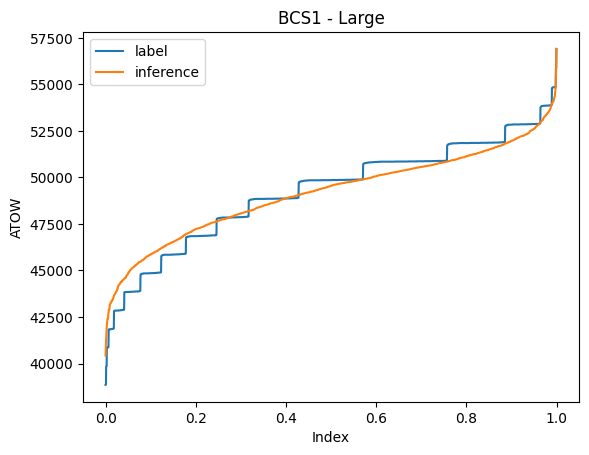

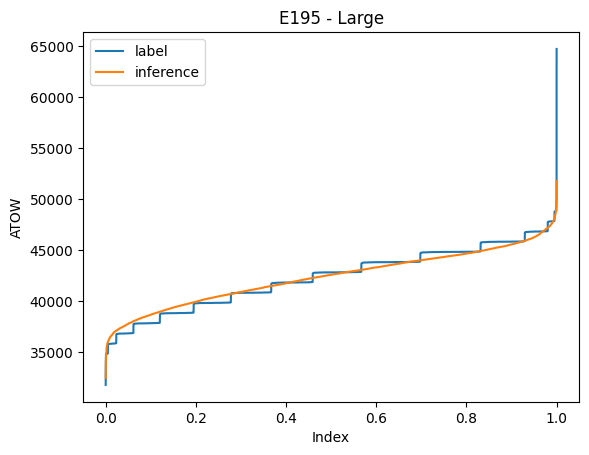

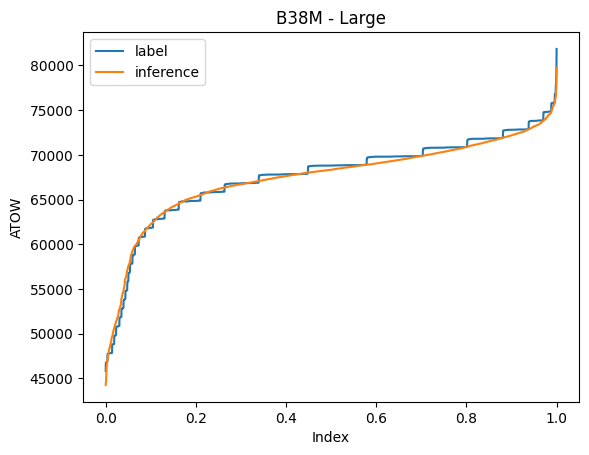

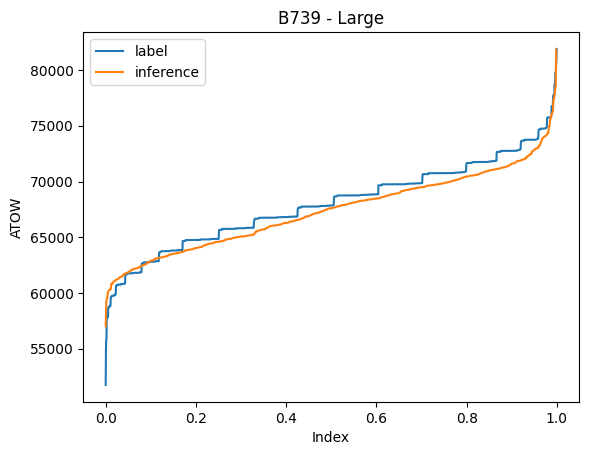

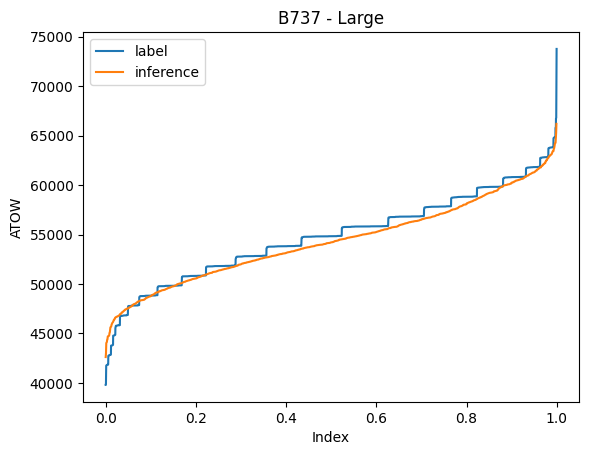

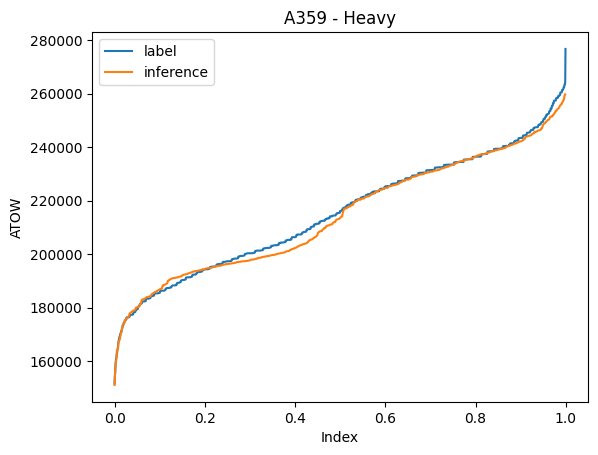

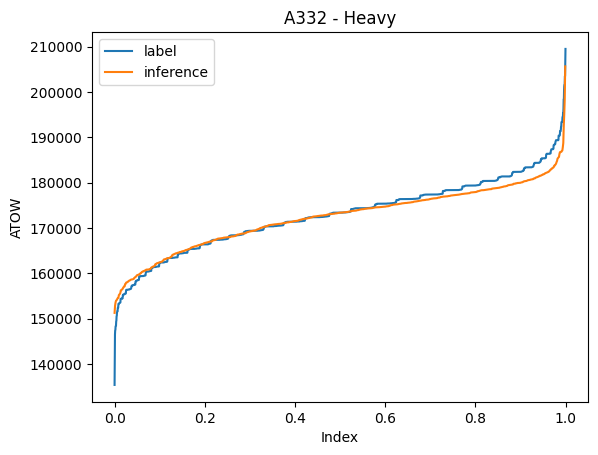

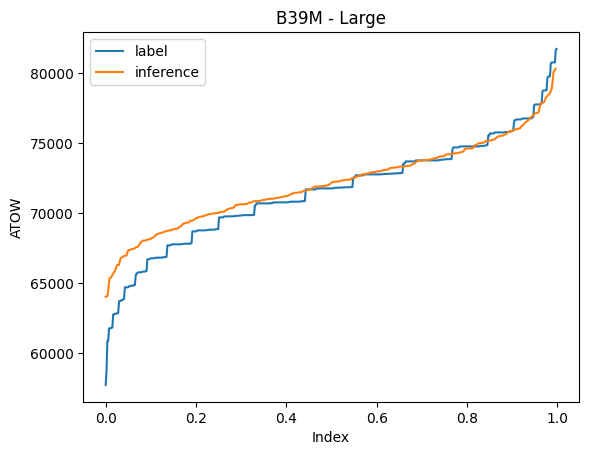

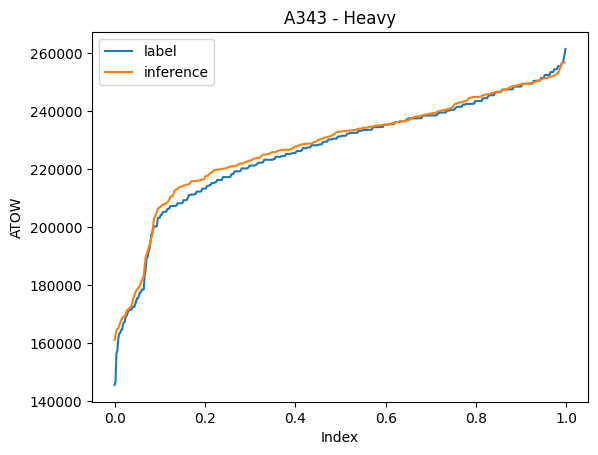

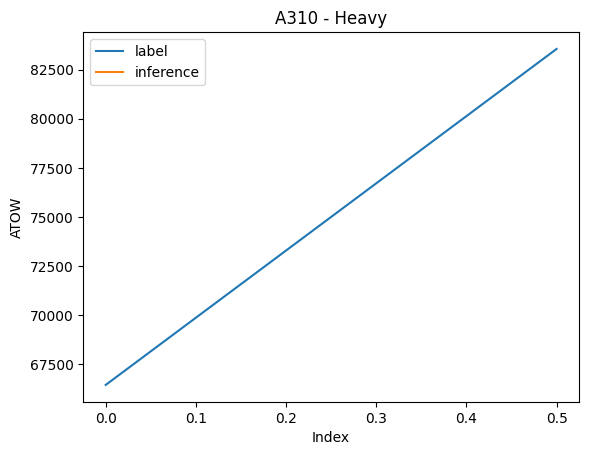

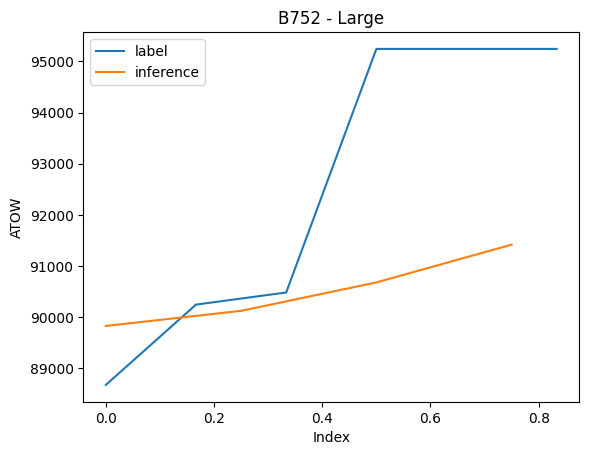

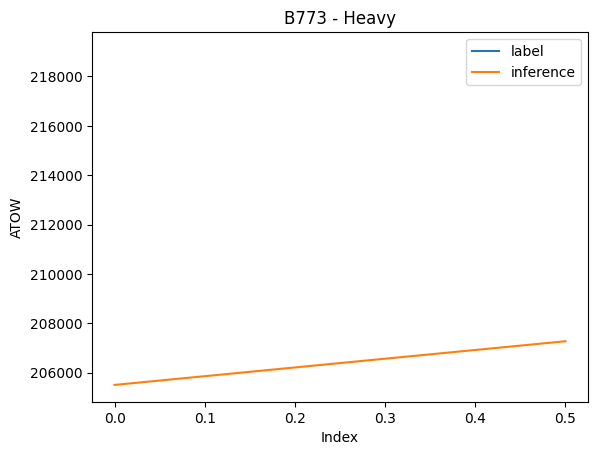

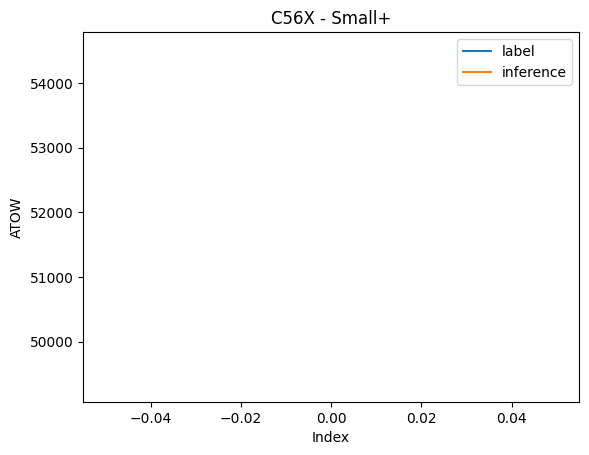

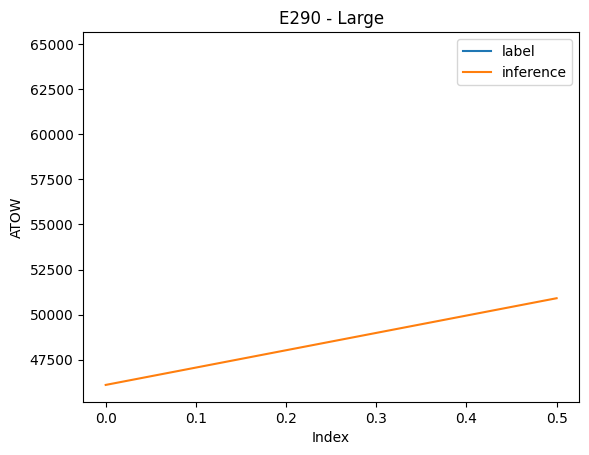

In [43]:
for aircraft_type in aircraft_types:
    flights_challenge = challenge_set_updated[challenge_set_updated['aircraft_type'] == aircraft_type]
    first_row = flights_challenge.iloc[0]
    weight_type = first_row['FAA_Weight']
    print(aircraft_type, weight_type, flights_challenge.shape)
    sorted_tows_challenge = challenge_set_updated[challenge_set_updated['aircraft_type'] == aircraft_type]['tow'].sort_values().to_numpy()
    num_tows_challenge = sorted_tows_challenge.shape[0]
    sorted_tows_submission = submission_set_updated[submission_set_updated['aircraft_type'] == aircraft_type]['tow'].sort_values().to_numpy()
    num_tows_submission = sorted_tows_submission.shape[0]
    plt.figure()
    plt.plot(np.array(range(num_tows_challenge))/num_tows_challenge, sorted_tows_challenge)
    plt.plot(np.array(range(num_tows_submission))/num_tows_submission, sorted_tows_submission)
    plt.xlabel('Index')
    plt.ylabel('ATOW')
    plt.legend(['label', 'inference'])
    plt.title('%s - %s' % (aircraft_type, weight_type))
    plt.savefig('%s-%s.png' % (aircraft_type, weight_type), format='png')
    # print(first_row)

In [37]:
def quantize_tow(row):
    if row['aircraft_type'] != 'AT76':
        return row
    if row['FAA_Weight'] == 'Heavy':
        return row
    aircraft_type = row['aircraft_type']
    flights_challenge = challenge_set_updated[challenge_set_updated['aircraft_type'] == aircraft_type]
    tow = row['tow']
    tows = flights_challenge['tow'].to_numpy()
    inearest = np.argmin(np.abs(tows - tow))
    row['tow'] = tows[inearest]
    return row

submission_set_quantized = submission_set_updated.copy()

tqdm.pandas()

submission_set_quantized = submission_set_quantized.progress_apply(quantize_tow, axis=1)

100%|█████████████████████████████████████████████████████████████████████████| 158149/158149 [02:41<00:00, 978.97it/s]


In [28]:
# from sklearn.neighbors import KNeighborsClassifier

# print(aircraft_types)

# knn_dict = dict()

# for aircraft_type in aircraft_types:
#     knn = KNeighborsClassifier(n_neighbors=1)  # You can adjust k here
#     flights = challenge_set_updated[challenge_set_updated['aircraft_type'] == aircraft_type]
#     tows = flights['tow'].to_numpy()
#     X = tows.reshape(-1, 1)
#     print(X)
#     y = tows.reshape(-1, 1)
#     knn.fit(X, y)
#     knn_dict[aircraft_type] = knn

AT76 Large (6897, 216)


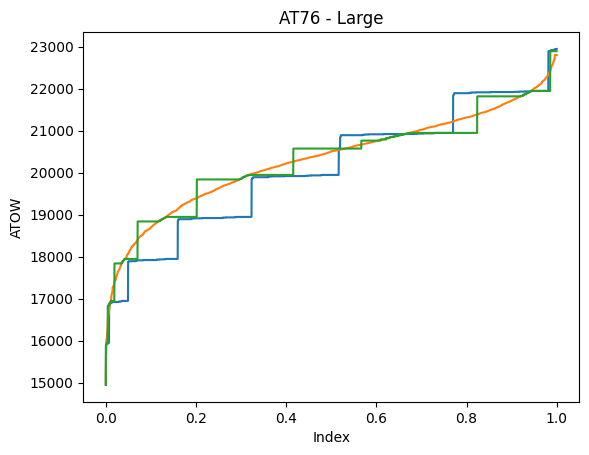

In [38]:
for aircraft_type in aircraft_types:
    if aircraft_type != 'AT76':
        continue
    flights_challenge = challenge_set_updated[challenge_set_updated['aircraft_type'] == aircraft_type]
    first_row = flights_challenge.iloc[0]
    weight_type = first_row['FAA_Weight']
    print(aircraft_type, weight_type, flights_challenge.shape)
    sorted_tows_challenge = challenge_set_updated[challenge_set_updated['aircraft_type'] == aircraft_type]['tow'].sort_values().to_numpy()
    num_tows_challenge = sorted_tows_challenge.shape[0]
    sorted_tows_submission = submission_set_updated[submission_set_updated['aircraft_type'] == aircraft_type]['tow'].sort_values().to_numpy()
    num_tows_submission = sorted_tows_submission.shape[0]
    sorted_tows_quantized = submission_set_quantized[submission_set_quantized['aircraft_type'] == aircraft_type]['tow'].sort_values().to_numpy()
    plt.figure()
    plt.plot(np.array(range(num_tows_challenge))/num_tows_challenge, sorted_tows_challenge)
    plt.plot(np.array(range(num_tows_submission))/num_tows_submission, sorted_tows_submission)
    plt.plot(np.array(range(num_tows_submission))/num_tows_submission, sorted_tows_quantized)
    plt.xlabel('Index')
    plt.ylabel('ATOW')
    plt.title('%s - %s' % (aircraft_type, weight_type))
    # print(first_row)

In [40]:
dft0 = pd.read_csv('./data/final_submission_set.csv')
dft0['tow'] = submission_set_quantized['tow']
dft0[['flight_id', 'tow']].to_csv('catboost_quantized.csv', index=False)

In [77]:
challenge_set_original = pd.read_csv('./data/challenge_set.csv')

In [78]:
challenge_set_original = challenge_set_original.sort_values('callsign')

In [81]:
challenge_set_original[['callsign', 'tow']]

,callsign,tow
185931,00022146143237a78a25a7da196ea936,70752.0
198762,000c346d3db3faef6b2398ac12889859,97559.0
94849,000c346d3db3faef6b2398ac12889859,112629.0
365882,0013d7a7bcfe67528adaf2f3207d2b8f,45816.0
294919,001850e2890ca4232245f8d99c9b75b0,67819.0
...,...,...
312542,fff04714d62a6bd2d6c60f121704a0ce,64791.0
348590,fff04714d62a6bd2d6c60f121704a0ce,68774.0
341483,fff04714d62a6bd2d6c60f121704a0ce,69826.0
343774,fff04714d62a6bd2d6c60f121704a0ce,68774.0


In [27]:
from catboost import CatBoostRegressor, Pool, metrics
from sklearn.model_selection import train_test_split

model = CatBoostRegressor()

In [28]:
model.load_model('catboost_all.cbm')

In [29]:
df_test = pd.read_csv("./data/submission_set_updated_v18.csv")
df_test.head()

,callsign,adep,ades,aircraft_type,wtc,airline,taxiout_time,flown_distance,track_variation_ARR_100,track_variation_DEP_40,...,Latitude_ades,Longitude_ades,Altitude_ades,actual_distance,altitude_difference,bearing,elevation_gradient,adep_geo_cluster,ades_geo_cluster,tow
0,3b3de0f3ad0ee192513995c02f7bf7cf,LTFJ,LFLL,B738,M,6351ec1b849adacc0cbb3b1313d8d39b,15.0,1122,95.626012,61.832877,...,45.726,5.091,251,2022.915548,-61,293.477205,-0.030154,11,17,NaN
1,e06dd03d4a879ca37d9e18c1bd7cad16,EBBR,KJFK,A333,H,bdeeef3a675587d530de70a25d7118d2,15.0,3205,101.189988,65.739142,...,40.640,-73.779,4,5886.430370,-53,291.395141,-0.009004,6,1,NaN
2,2d3b1c962c78c4ebeef11bcd51b9e94c,KMIA,EGLL,B77W,H,5543e4dc327359ffaf5b9c0e6faaf0e1,10.0,3965,1.711789,74.068356,...,51.477,-0.461,25,7108.920003,22,43.036806,0.003095,12,13,NaN
3,35f7721f68bf85128195547ae38b0f04,EBBR,LEAL,B738,M,f53c55b5cf0cbb3be755bf50df6fa52d,9.0,802,101.738231,51.771476,...,38.282,-0.558,44,1458.405355,-13,197.753476,-0.008914,6,19,NaN
4,eb56918bee9bc5204624186b9bcc4391,LSZH,LFPG,BCS3,M,2d5def0a5a844b343ba1b7cc9cb28fa9,11.0,292,68.791836,68.987429,...,49.013,2.550,120,476.291487,-312,293.398537,-0.655061,2,6,NaN


In [30]:
X_test = df_test.drop('tow', axis=1)

In [33]:
X_test = X_test.drop('callsign', axis=1)
y_pred = model.predict(X_test)
y_test = y_pred

In [34]:
y_test

array([ 69471.34081072, 213694.39880119, 222960.98572968, ...,
       197915.81333156,  41448.74984843,  63622.57909623])

In [35]:
dft0 = pd.read_csv('./data/final_submission_set.csv')
print(dft0)

        flight_id        date                          callsign  adep  \
0       248753821  2022-01-01  3b3de0f3ad0ee192513995c02f7bf7cf  LTFJ   
1       248753822  2022-01-01  e06dd03d4a879ca37d9e18c1bd7cad16  EBBR   
2       248754498  2022-01-01  2d3b1c962c78c4ebeef11bcd51b9e94c  KMIA   
3       248763650  2022-01-01  35f7721f68bf85128195547ae38b0f04  EBBR   
4       248763651  2022-01-01  eb56918bee9bc5204624186b9bcc4391  LSZH   
...           ...         ...                               ...   ...   
158144  258068876  2022-12-31  c9fca302ca2e28acab0eb0bb1b46f11b  LTFM   
158145  258064675  2022-12-31  00f96ad0e382476649574ba044c764fc  EHAM   
158146  258065436  2022-12-31  87c552b7f6d9bbd16a66e95df761c7f2  LEBL   
158147  258058138  2022-12-31  2cd57e434494606c965bac87c024bda2  LIPE   
158148  258058370  2022-12-31  5f0c222c7f7ceff3fbe75c854cce74c9  UBBB   

                     name_adep country_code_adep  ades  \
0       Istanbul Sabiha Gokcen                TR  LFLL   
1      

In [36]:
dft0 = pd.read_csv('./data/final_submission_set.csv')
dft0['tow'] = y_test
dft0[['flight_id', 'tow']].to_csv('catboost.csv', index=False)

In [49]:
submission_dataset = df_test
submission_dataset['tow'] = y_pred
# submission_dataset.head()
pd.set_option('display.max_rows', None)
# print(submission_dataset.T)
pd.reset_option('display.max_rows')
print((submission_dataset['tow'] > submission_dataset['MTOW_kg']).sum())
mask = (submission_dataset['tow'] > submission_dataset['MTOW_kg'])
submission_dataset.loc[mask, 'tow'] = submission_dataset.loc[mask, 'MTOW_kg']
print((submission_dataset['tow'] > submission_dataset['MTOW_kg']).sum())

97
0


In [50]:
dft0 = pd.read_csv('./data/final_submission_set.csv')
dft0['tow'] = submission_dataset['tow']
dft0[['flight_id', 'tow']].to_csv('catboost_sat.csv', index=False)